# Chapter 1 Basic techniques and methods 
## The mean-field ferromagnet of Currie & Weiss

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Exercise 1.4 Metropolis-Hastings Algorithm

Consider the Hamiltonian of the Currie-Weiss model:

$$  {\cal H} ( {\bf S}; h  ) )   = - \frac{1}{2 N} \sum_{j = 1}^{N} \sum_{k = 1}^{N} S_j S_k    - h  \sum_{j=1}^{N} S_j  \;.  $$ 

A very practical way to sample configurations of $N$ spins from the Gibbs-Boltzmann distribution, 

$$ P ( {\bf S } = {\bf s} ; \beta, h ) = \frac{ \exp(-\beta {\cal H} ( {\bf s}; h  ) ) }{  Z_N  (\beta; h) }   \;$$

is the Monte-Carlo Markov Chain (MCMC) method, and in particular the Metropolis-Hastings algorithm. It works as follows:

1. Choose a starting configuration for the $N$ spins values $ s_j = \pm 1$ for $j=1, ..., N$.
2. Choose a spin $j$ at random. Compute the current value of the energy $E_{\text{now}}$ and the value of the energy $E_{\text{flip}}$ if the spin $j$ is flipped (that is if $S_{j}^{\text{new}} = - S_{j}^{\text{old}}  $)
3. Sample a number $r$ uniformly in $[0,1]$ and if $   r <  e^{ -\beta  ( E_{\text{flip}} - E_{\text{now}}  ) }$, perform the flip (that is $S_{j}^{\text{new}} = - S_{j}^{\text{old}}  $). Otherwise leave as it is.
4. Go back to step 2.

If one is performing this program long enough, it is guaranteed that the final configuration $ ( \{S \}) $ will have been chosen with the correct probability.

### Code to perform the MCMC dynamics

Observe that the Curie-Weiss Hamiltonian can be written as 

$$ {\cal H} (   \bar{S} ; h  )    = - N \left( \frac{1}{2} \bar{S}^2 + h   \bar{S} \right)  \;, $$
with $ \bar{S} \equiv \sum_{j=1}^{N} S_{j} / N  $.
 


In [134]:
def MC(S0, beta, h):
    
    #def en(S, h):
    #    return -0.5*np.mean(S)*np.mean(S) - h*np.mean(S)
    

    S1 = np.copy(S0)
    N = len(S0)
    j = np.random.randint(0, N)
    
    S1[j] = -S1[j]
    r = np.random.random()
    
    en0 =  -0.5*N*np.mean(S0)*np.mean(S0) - N*h*np.mean(S0)
    en1 =  -0.5*N*np.mean(S1)*np.mean(S1) - N*h*np.mean(S1)
    
    
    if r < np.exp(-beta*(en1 - en0)):
        S0[j] = -S0[j]
        
    return S0

In [135]:
def MCMC(N, beta, h):
    
    t_max = 100*N
    S0 = np.ones(N)
    
    m_ = []
    
    for k in range(t_max):
        Sk = MC(S0, beta, h)
        S0 = np.copy(Sk)
    
        m = np.mean(S0)
        m_.append(m)
        
    return m_

### Case $ h = 0 $ and $ \beta = 1.2$ 

In [136]:
N = [10, 50, 100, 200, 1000]
mN_ = []
beta = 1.2
h = 0

for n in N:
    print('N = ', n)
    mN_.append(MCMC(n, beta, h))

N =  10
N =  50
N =  100
N =  200
N =  1000


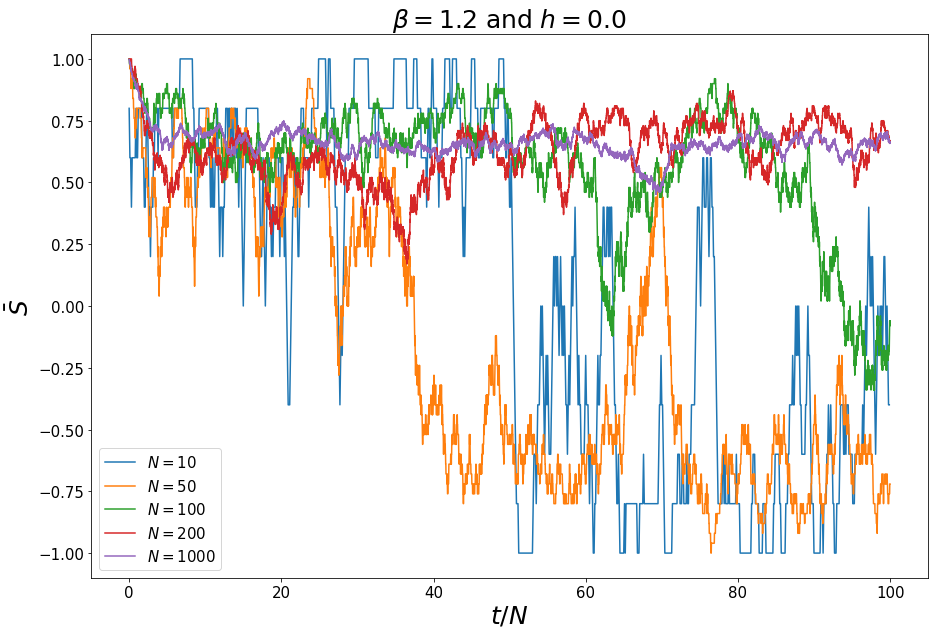

In [138]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))

for n, m in zip(N, mN_):
    ax.plot(np.arange(0, len(m)) / n ,  m, label= '$N = %d$' % n)
    
ax.set_xlabel('$t/N$', fontsize= 25)
ax.set_ylabel('$\\bar{S}$', fontsize= 25)
ax.tick_params(labelsize=15)
ax.legend(fontsize= 15)
ax.set_title('$\\beta =  %.1f $ and $h = %.1f $' % (beta, h), fontsize= 25)
plt.show()

### Case $ h = - 0.1 $ and $ \beta = 1.2$

In [139]:
N = [10, 50, 100, 200, 1000]
mN_ = []
beta = 1.2
h = -0.1

for n in N:
    print('N = ', n)
    mN_.append(MCMC(n, beta, h))

N =  10
N =  50
N =  100
N =  200
N =  1000


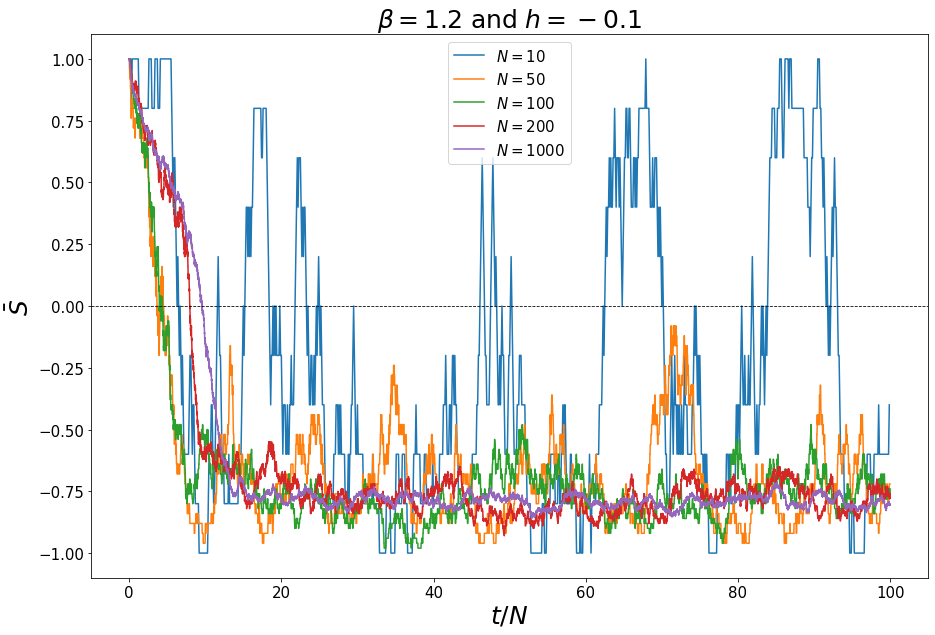

In [140]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))

for n, m in zip(N, mN_):
    ax.plot(np.arange(0, len(m)) / n ,  m, label= '$N = %d$' % n)
    
ax.set_xlabel('$t/N$', fontsize= 25)
ax.set_ylabel('$\\bar{S}$', fontsize= 25)
ax.axhline(color= 'k', lw= 0.8, ls='--')
ax.tick_params(labelsize=15)
ax.legend(fontsize= 15)
ax.set_title('$\\beta =  %.1f $ and $h = %.1f $' % (beta, h), fontsize= 25)
plt.show()